<a href="https://colab.research.google.com/github/Rifat429/DL/blob/main/Yolov8_crack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Sep 20 08:07:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME= os.getcwd()
print(HOME)

/content


In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 7.6 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
 %cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 241MB/s]
Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 88.3MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 229.1ms
Speed: 13.1ms preprocess, 229.1ms inference, 24.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


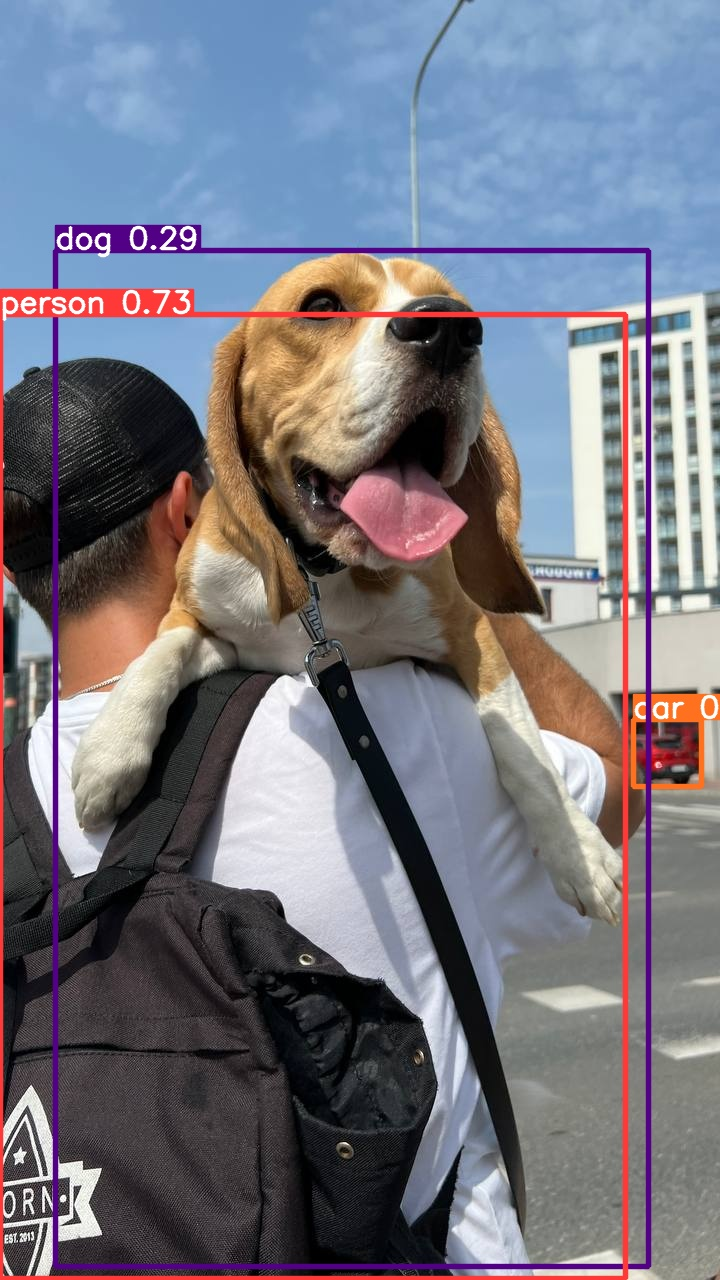

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 104.5ms
Speed: 2.0ms preprocess, 104.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1947],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pNWm3q4Nw95IjkpDMdqc")
project = rf.workspace("csu-dv00b").project("road-crack-o7q1z")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.182, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Road-Crack-1 in yolov8:: 100%|██████████| 24/24 [00:00<00:00, 4314.20it/s]


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml  epochs=50 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Road-Crack-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

In [15]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


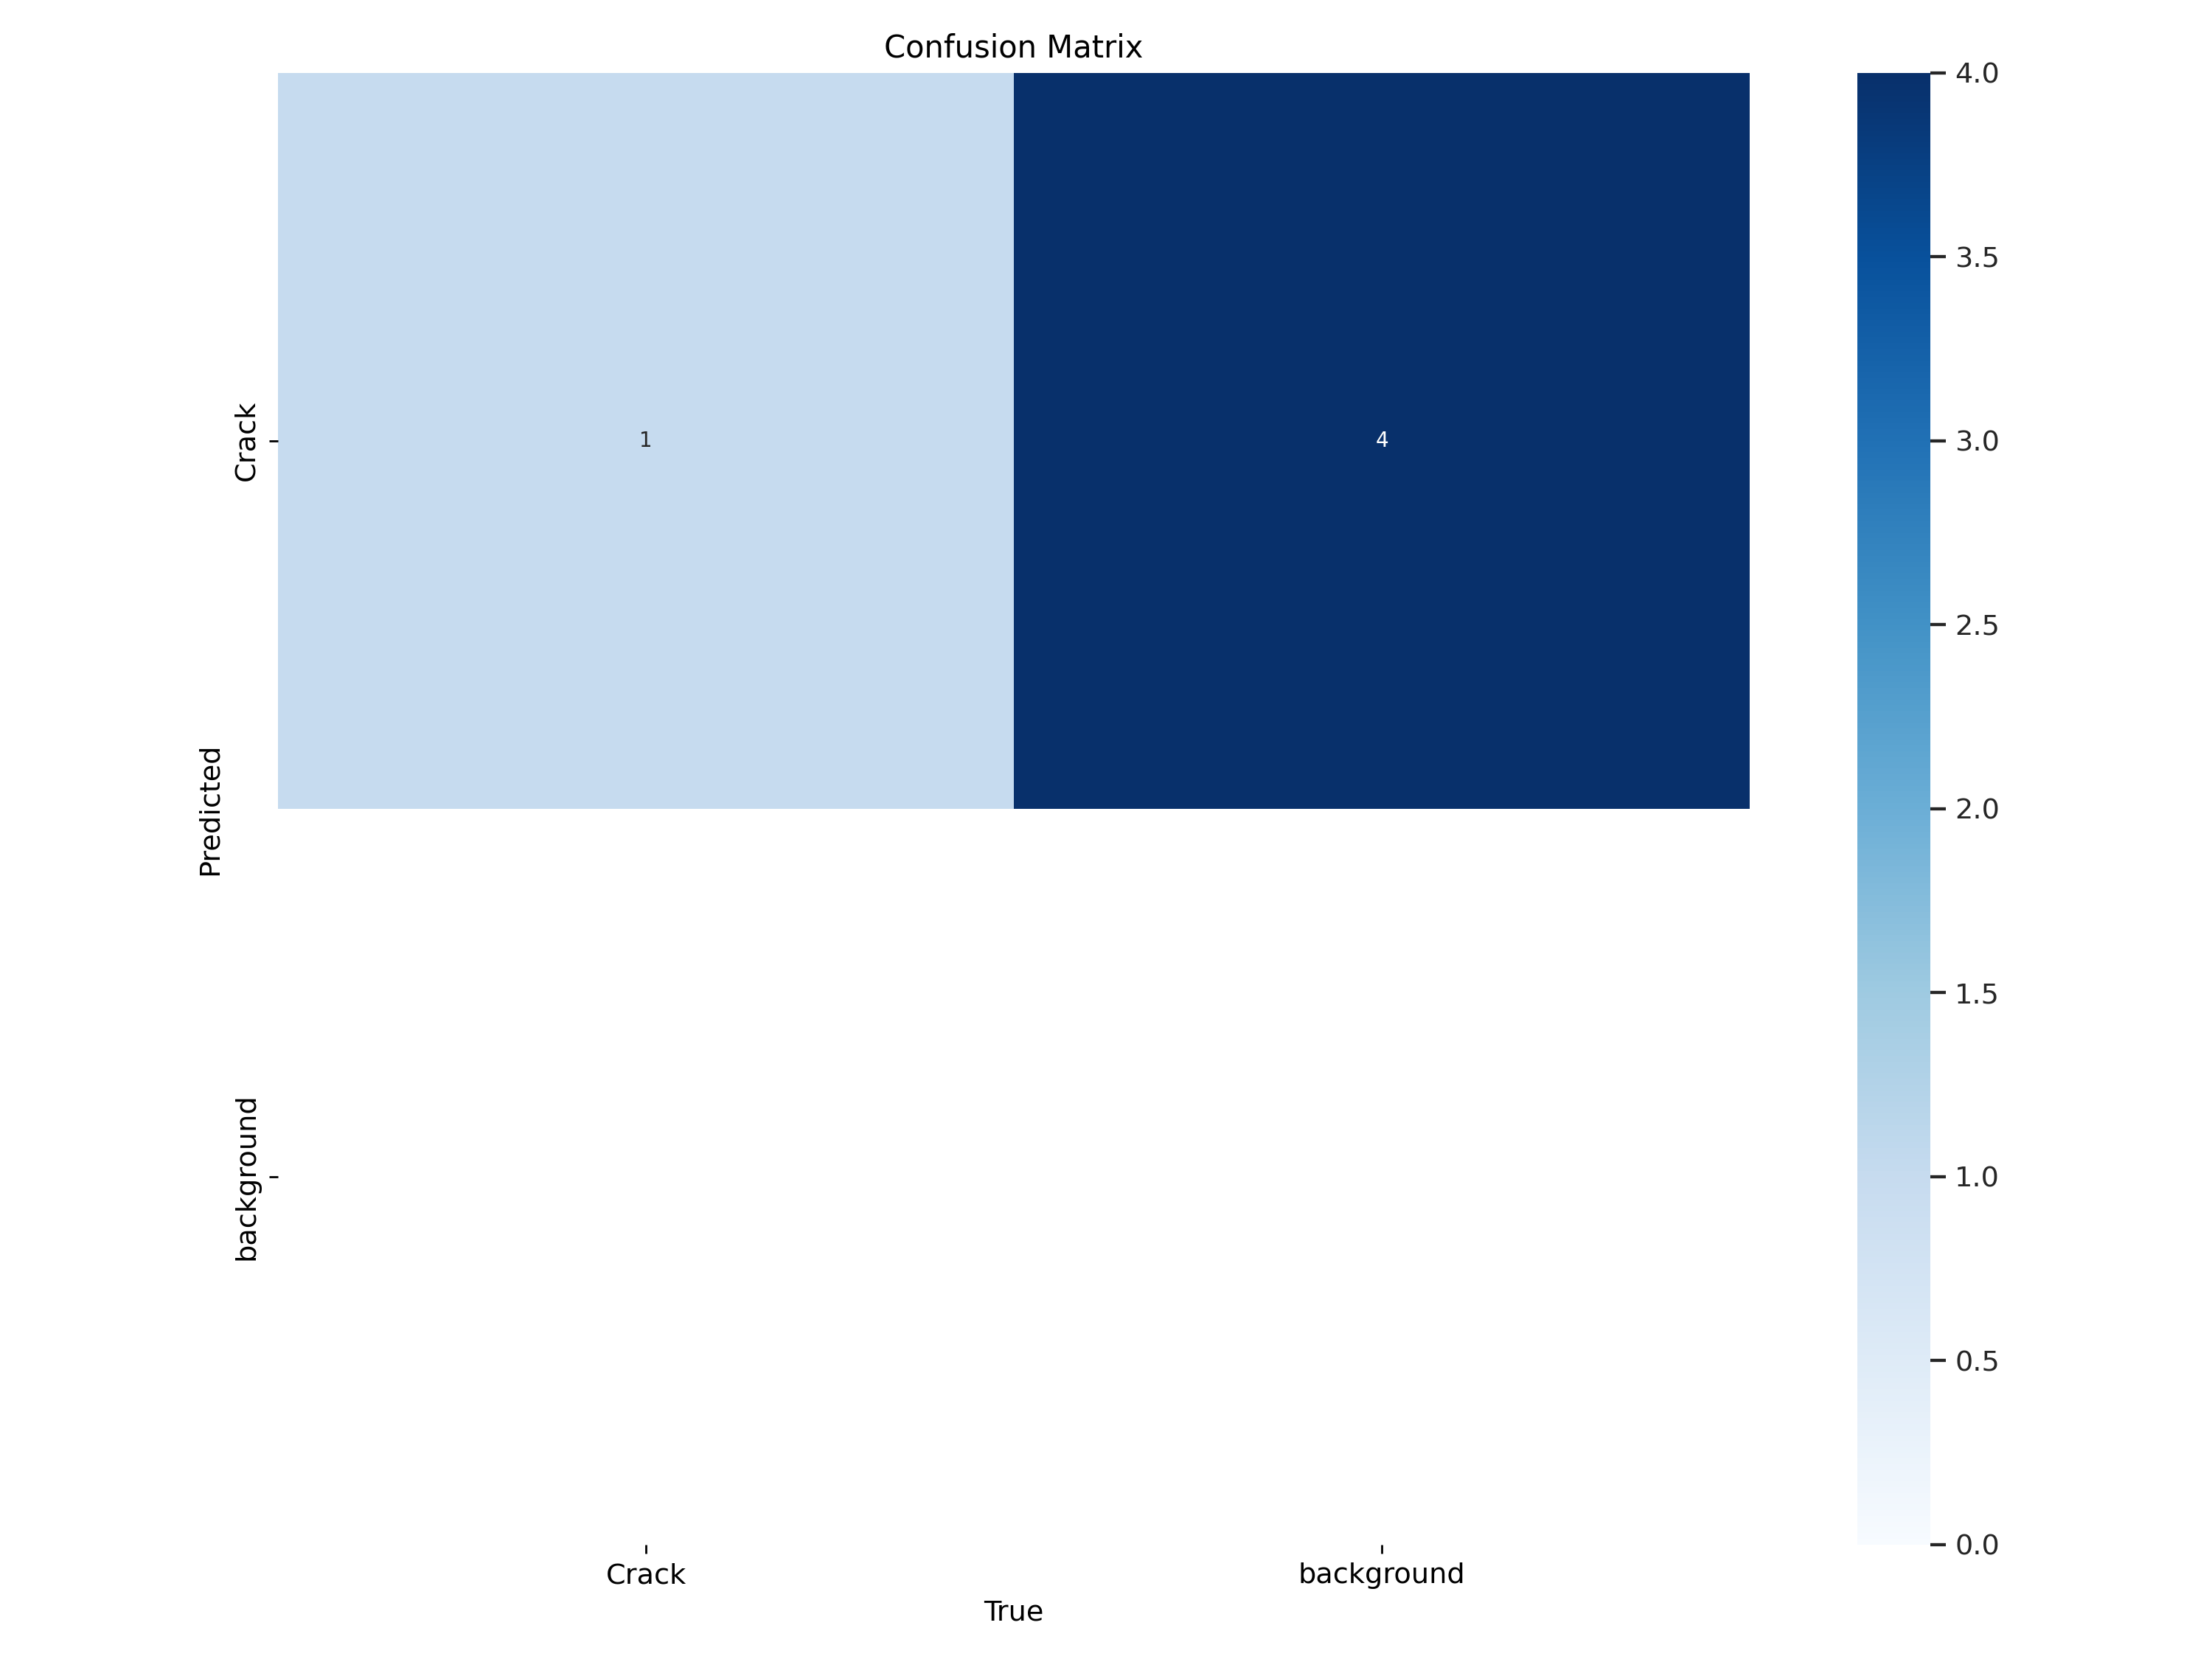

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)


/content


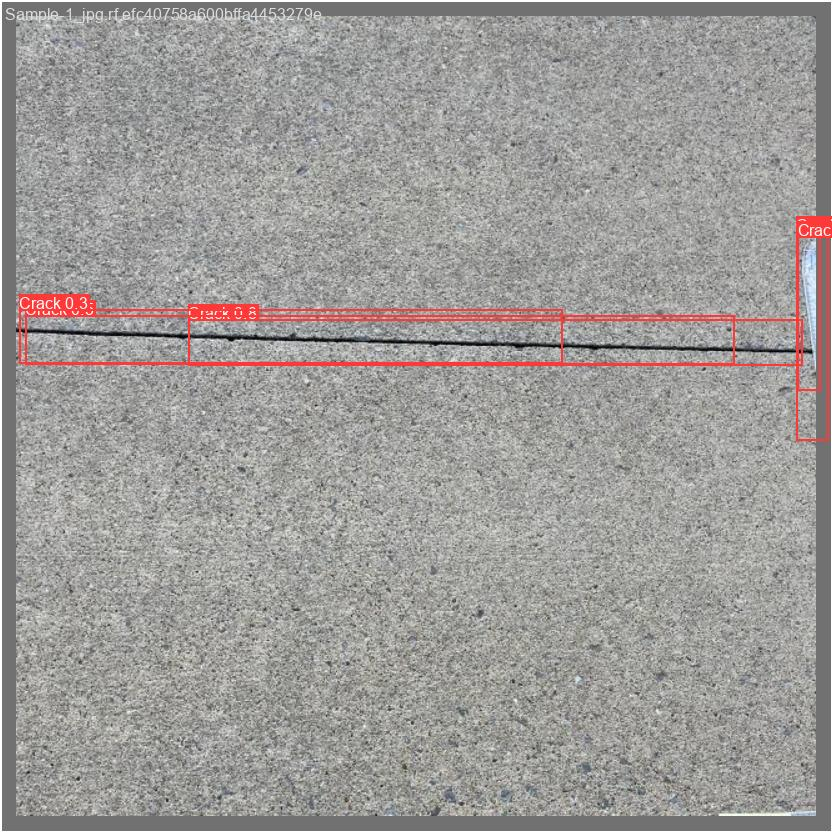

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

/content


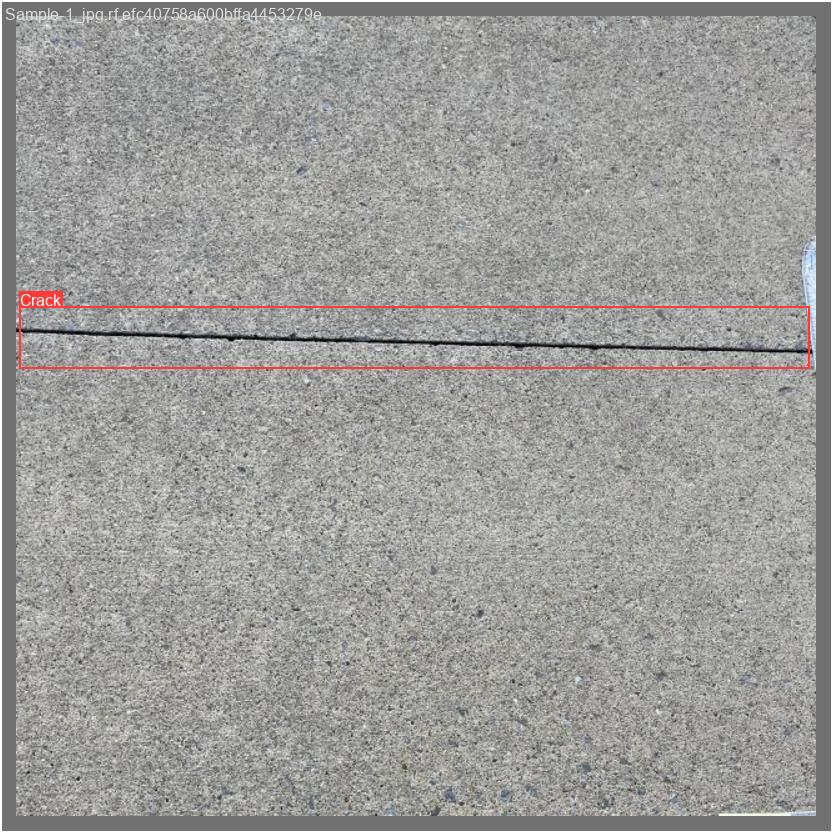

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_labels.jpg', width=600)

/content


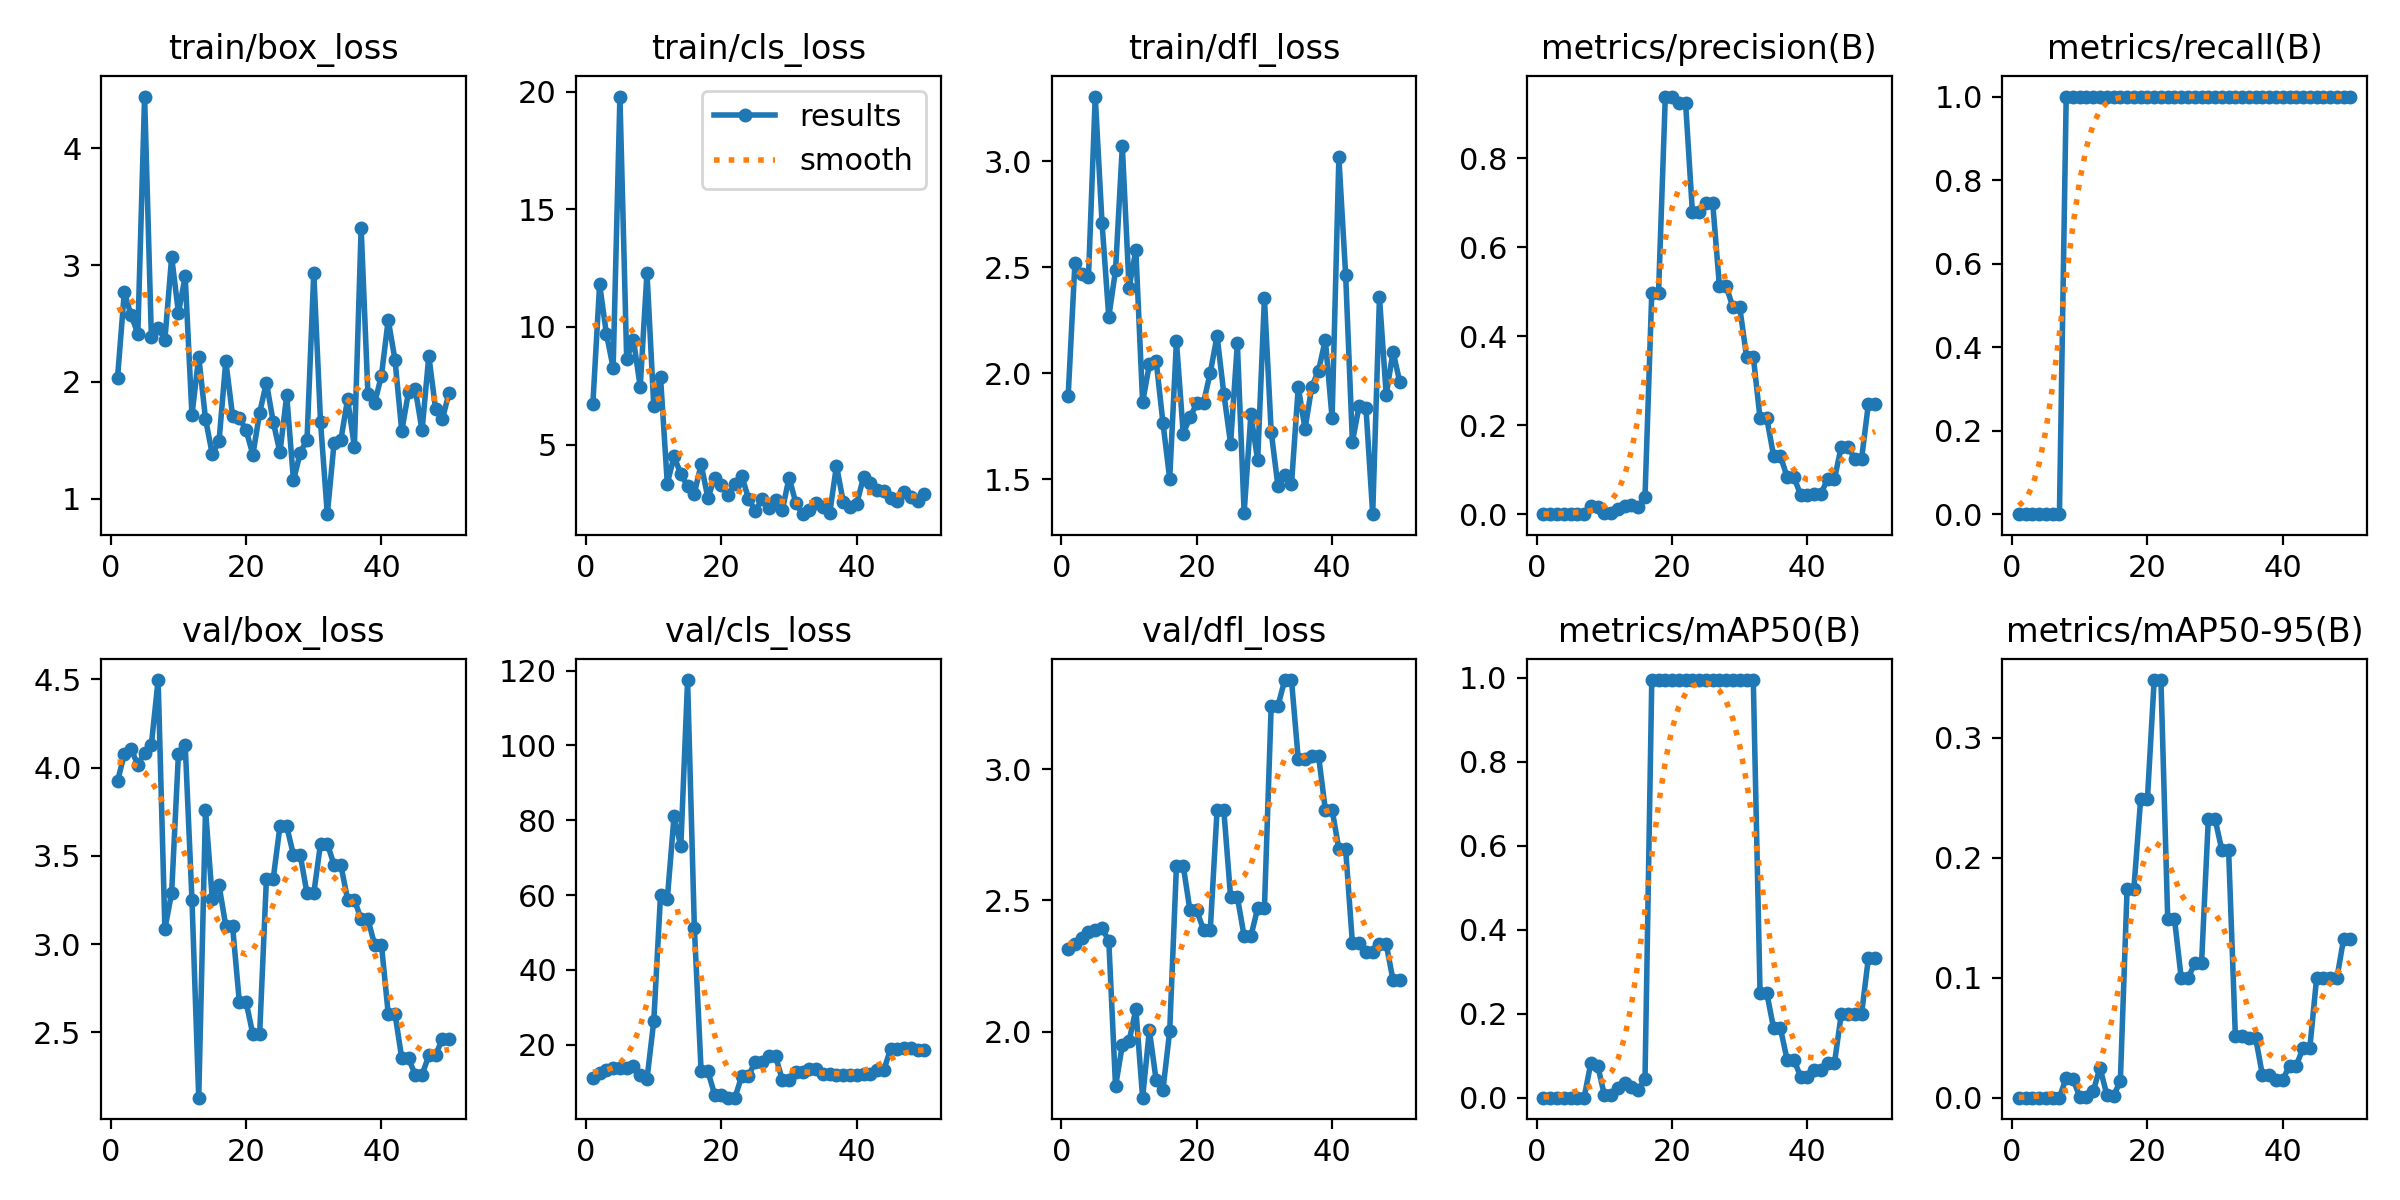

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [34]:
# # model = YOLO(f'{HOME}/yolov8n.pt')
# model=YOLO("/content/yolov8s.pt")
# results = model(source='/content/Road-Crack-1/train/images/sample-6_jpg.rf.0397a00d72e3ed7920859f1cb4ae98f6.jpg', task="detect",conf=0.25)

In [35]:
# results

In [38]:
import cv2

# Load the image
image = cv2.imread('/content/runs/detect/train2/val_batch0_pred.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)


In [40]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [41]:
for contour in contours:
    # Calculate length
    length = cv2.arcLength(contour, True)

    # Calculate width
    rect = cv2.minAreaRect(contour)
    width = rect[1][0] if rect[1][0] > rect[1][1] else rect[1][1]

    print(f"Crack Length: {length}, Crack Width: {width}")


Crack Length: 3324.0, Crack Width: 831.0


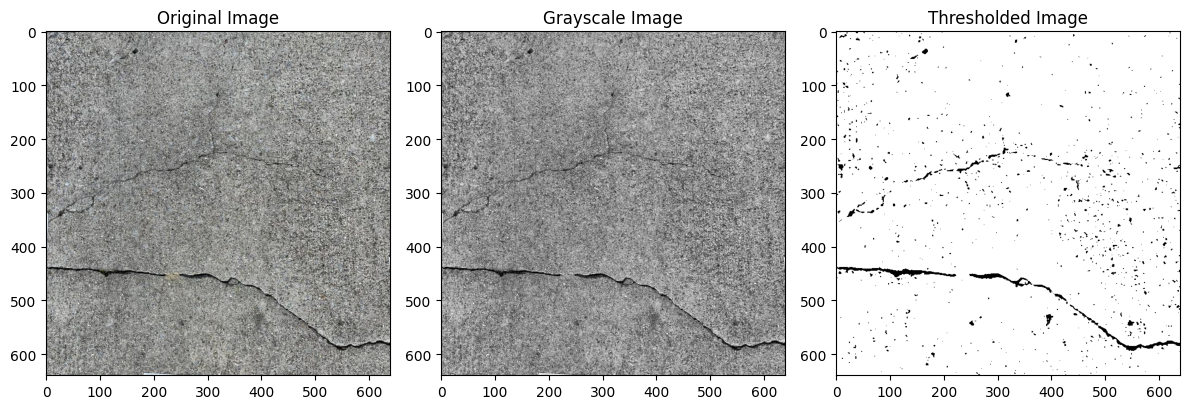

Crack Length: 4.0, Crack Width: 1.0
Crack Length: 3585.3595136404037, Crack Width: 639.0


In [43]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Road-Crack-1/train/images/sample-6_jpg.rf.0397a00d72e3ed7920859f1cb4ae98f6.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Plot the original image
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Plot the grayscale image
plt.subplot(132)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")

# Plot the thresholded image
plt.subplot(133)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")

plt.tight_layout()
plt.show()

# Analyze contours and print results
for contour in contours:
    # Calculate length
    length = cv2.arcLength(contour, True)

    # Calculate width
    rect = cv2.minAreaRect(contour)
    width = rect[1][0] if rect[1][0] > rect[1][1] else rect[1][1]

    print(f"Crack Length: {length}, Crack Width: {width}")